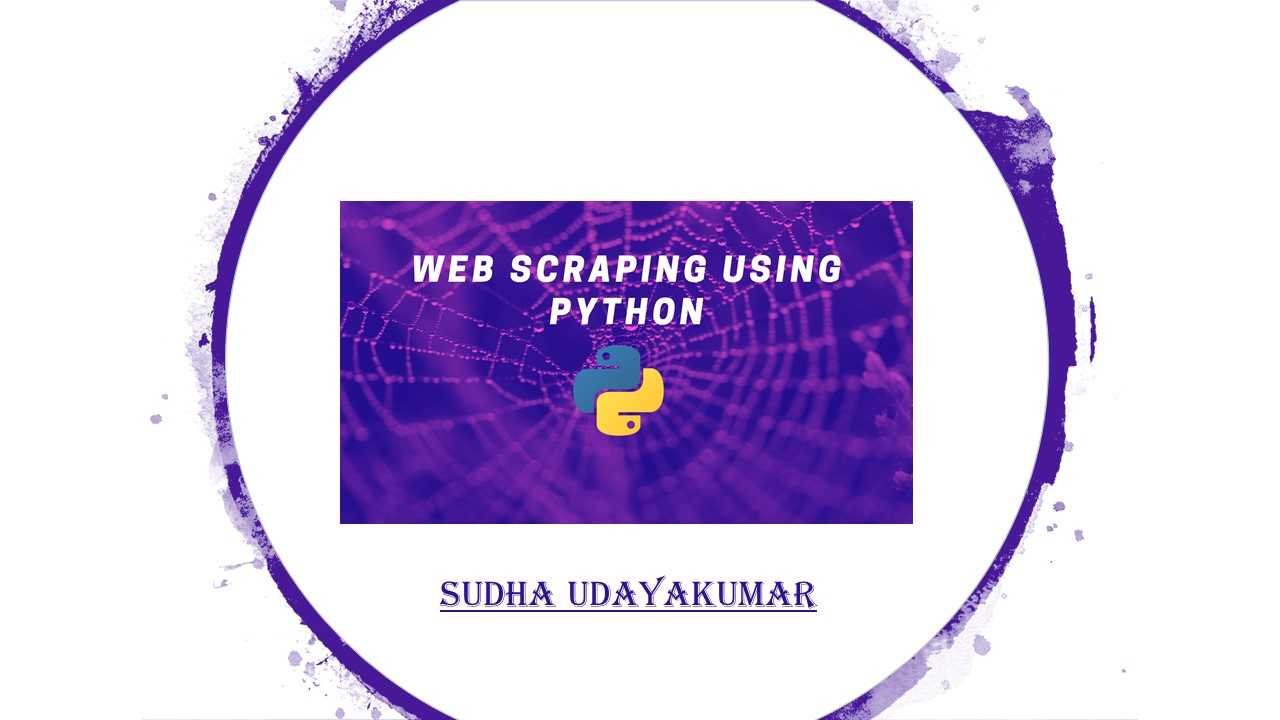

# Web Scrapping Assignment 3

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Web-Scrapping-Assignment-3" data-toc-modified-id="Web-Scrapping-Assignment-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Web Scrapping Assignment 3</a></span><ul class="toc-item"><li><span><a href="#Q1-Amazon--Takes-user-input" data-toc-modified-id="Q1-Amazon--Takes-user-input-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Q1 Amazon- Takes user input</a></span></li><li><span><a href="#Q2-Amazon-(Continued)--Scrapping-and-creating-a-Dataframe" data-toc-modified-id="Q2-Amazon-(Continued)--Scrapping-and-creating-a-Dataframe-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Q2 Amazon (Continued)- Scrapping and creating a Dataframe</a></span></li><li><span><a href="#Q3-Images--Searches-for-google-images-and-downloads-them" data-toc-modified-id="Q3-Images--Searches-for-google-images-and-downloads-them-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Q3 Images- Searches for google images and downloads them</a></span></li><li><span><a href="#Q4-Flipkart--Smartphone--pixel-4A" data-toc-modified-id="Q4-Flipkart--Smartphone--pixel-4A-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Q4 Flipkart- Smartphone- pixel 4A</a></span></li><li><span><a href="#Q5-Google-Maps--scrap-geospatial-coordinates-(lat-&amp;-long)" data-toc-modified-id="Q5-Google-Maps--scrap-geospatial-coordinates-(lat-&amp;-long)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Q5 Google Maps- scrap geospatial coordinates (lat &amp; long)</a></span></li><li><span><a href="#Q6-Funding-deals-from-trak.in" data-toc-modified-id="Q6-Funding-deals-from-trak.in-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Q6 Funding deals from trak.in</a></span></li><li><span><a href="#Q7-Gaming-laptops-from-digit.in" data-toc-modified-id="Q7-Gaming-laptops-from-digit.in-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Q7 Gaming laptops from digit.in</a></span></li></ul></li></ul></div>

In [1]:
import selenium 
import pandas as pd
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

In [31]:
driver=webdriver.Chrome("chromedriver.exe")

## Q1 Amazon- Takes user input

<b>1. Write a python program which searches all the product under a particular product vertical from www.amazon.in. The product verticals to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.</b>

In [29]:
url='http://www.amazon.in/'
driver.get(url)

time.sleep(3)

#clicking on product vertical
prod_vertical=driver.find_element_by_xpath("//select[@class='nav-search-dropdown searchSelect nav-progressive-attrubute nav-progressive-search-dropdown']/option")
prod_vertical.click() 

#locating search bar and typing desired input
search=driver.find_element_by_id("twotabsearchtextbox") 
search_ob=input("What do you want to search? ")
search.send_keys(search_ob) 

#clicking on search button
search_=driver.find_element_by_xpath('//span[@class="nav-search-submit-text nav-sprite nav-progressive-attribute"]')
search_.click()

What do you want to search? guitar


## Q2 Amazon (Continued)- Scrapping and creating a Dataframe

<B>2. In the above question, now scrape the following details of each product listed in first 3 pages
of your search results and save it in a dataframe and csv. In case if any product vertical has
less than 3 pages in search results then scrape all the products available under that product
vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of
Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details"
and “Product URL”. In case, if any of the details are missing for any of the product then
replace it by “-“.</B>

In [30]:

#creating empty list
brand=[]
price=[]
rating=[]
name=[]
num_ratings=[]
return_exchange=[]
delivery=[]
availability=[]
other_details=[]
prod_urls=[]

time.sleep(3)

#scrapping required details
start=0
end=2
        
#scrapping rest of required data
prod_urls=[]
for page in range(0,2):
    urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")  #scrapping product urls
    for i in urls:
        prod_urls.append(i.get_attribute("href"))
    next_button=driver.find_element_by_xpath("//li[@class='a-last']/a")

time.sleep(2)
for i in prod_urls:
    driver.get(i)
    #brands
    try:
        item_brand=driver.find_element_by_xpath('//*[@id="productTitle"]')
        brand.append(item_brand.text)
    except NoSuchElementException:
        brand.append('-')
    #price
    try:
        item_price=driver.find_element_by_id("priceblock_ourprice")
        price.append(item_price.text)
    except NoSuchElementException:
        price.append('-')
    #rating
    try:
        item_rating=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-base']")
        rating.append(item_rating.text)
    except NoSuchElementException:
        rating.append('-')
    #name
    try:
        item_name=driver.find_element_by_xpath("//td[@class='a-size-base prodDetAttrValue'][12]")
        name.append(item_name.text)
    except NoSuchElementException:
        name.append('-')  
        #number of ratings
    try:
        item_num=driver.find_element_by_xpath("//span[@class='a-size-base']")
        num_ratings.append(item_num.text)
    except NoSuchElementException:
        num_ratings.append('-')
       #return or exchange
    try:
        item_return=driver.find_element_by_xpath("//a[@class='a-size-small a-link-normal a-text-normal']")
        return_exchange.append(item_return.text)
    except NoSuchElementException:
        return_exchange.append('-')
        
            #delivery
    try: 
        item_del=driver.find_element_by_xpath("//div[@class='a-section a-spacing-none']/b")
        delivery.append(item_del.text)
    except NoSuchElementException:
        delivery.append('-')
           #availability
    try:
        item_ava=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
        availability.append(item_ava.text)
    except NoSuchElementException:
        availability.append('-')
    
        #other details
    try:
        item_det=driver.find_element_by_xpath("//div[@class='a-section a-spacing-medium a-spacing-top-small']")
        other_details.append(item_det.text)
    except NoSuchElementException:
        other_details.append(item_det.text)    
    

In [31]:
print(len(brand))  #printing length of everything
print(len(price))
print(len(rating))
print(len(name))
print(len(num_ratings))
print(len(return_exchange))
print(len(availability))
print(len(delivery))
print(len(other_details))
print(len(prod_urls))

130
130
130
130
130
130
130
130
130
130


In [33]:
Amazon=pd.DataFrame({})  #creating dataframe
Amazon['Brand']=brand
Amazon['Product Name']=name
Amazon['Price']=price
Amazon['Rating']=rating
Amazon['Number of ratings']=num_ratings
Amazon['Return or Exchange']=return_exchange
Amazon['Delivery']=delivery
Amazon['Availability']=availability
Amazon['Other Details']=other_details
Amazon['Product URLS']=prod_urls
Amazon.replace(to_replace=[r"\\t|\\n||\\r","\t|\n|\r"], value=['',''],regex=True,inplace= (True))
Amazon

,Brand,Product Name,Price,Rating,Number of ratings,Return or Exchange,Delivery,Availability,Other Details,Product URLS
0,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,-,"₹ 6,999.00",4 out of 5,,7 Days Replacement,-,-,About this itemQUALITY STRINGS ---The surface ...,https://www.amazon.in/gp/slredirect/picassoRed...
1,"Kadence Frontier Series,Blue Acoustic Guitar W...",-,-,4 out of 5,,7 Days Replacement,-,Only 1 left in stock.,About this itemProduct Type : Acoustic GuitarB...,https://www.amazon.in/gp/slredirect/picassoRed...
2,Kadence Slowhand Premium Jumbo Size Semi Acous...,-,-,4.3 out of 5,,7 Days Replacement,-,In stock.,,https://www.amazon.in/gp/slredirect/picassoRed...
3,JUAREZ 38 Inch Acoustic Guitar with Dual Actio...,-,-,3 out of 5,Item arrives in packaging that reveals what’s ...,7 Days Replacement,-,In stock.,"About this itemGlossy finish, Number of frets ...",https://www.amazon.in/gp/slredirect/picassoRed...
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",-,"₹ 2,499.00",3.9 out of 5,,7 Days Replacement,-,In stock.,"About this itemBlack Glossy Finish, Number of ...",https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...,...,...,...
125,JUAREZ Fiésta 41 Inch Acoustic Guitar with Dua...,-,"₹ 4,009.00",3.6 out of 5,,7 Days Replacement,-,In stock.,"About this itemGlossy finish, Number of frets ...",https://www.amazon.in/JUAREZ-Acoustic-Rosewood...
126,"ARCTIC Sky Series 39"" Guitar (with Truss Rod) ...",-,"₹ 6,297.00",-,,7 Days Replacement,-,In stock.,About this itemARCTIC Ultra pack is an astound...,https://www.amazon.in/gp/slredirect/picassoRed...
127,"JUAREZ Arpeggio 39 Inch Acoustic Guitar Kit, S...",-,-,3.4 out of 5,,7 Days Replacement,-,In stock.,About this itemJuarez Arpeggio 39 Inch Acousti...,https://www.amazon.in/gp/slredirect/picassoRed...
128,VD ENTERPRISE String Acoustic Guitar | Adjusta...,-,₹ 979.00,3.6 out of 5,,7 Days Replacement,-,In stock.,Toy Guitar is a Great Creativity for little Ki...,https://www.amazon.in/gp/slredirect/picassoRed...


## Q3 Images- Searches for google images and downloads them

<b>3. Write a python program to access the search bar and search button on images.google.com and
scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.</b>

In [60]:
url1='https://images.google.com/'
driver.get(url1)

Fruits

In [61]:
search_box=driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input')
search_box.send_keys('Fruits')  
search_button=driver.find_element_by_xpath('//*[@id="sbtc"]/button')
search_button.click()

In [67]:
#Will keep scrolling down the webpage until it cannot scroll no more
last_height = driver.execute_script('return document.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(2)
    new_height = driver.execute_script('return document.body.scrollHeight')
    try:
        driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[3]/div[2]/input').click()
        time.sleep(2)
    except:
        pass
    if new_height == last_height:
        break
    last_height = new_height

In [68]:
for i in range(1,101):  #downloading/screenshotting fruits
    try:
        driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img').screenshot(r'C:\100 fruits\Fruits('+str(i)+').png')
    except:
        pass

Cars

In [73]:
#clearing search bar
search_box1=driver.find_element_by_name('q')
search_box1.clear()
#sending cars
search_box1.send_keys('Cars')
#clicking on the search button
search_button1=driver.find_element_by_id('BIqFsb')
search_button1.click()

time.sleep(2)

#Will keep scrolling down the webpage until it cannot scroll no more
last_height = driver.execute_script('return document.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(2)
    new_height = driver.execute_script('return document.body.scrollHeight')
    try:
        driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[3]/div[2]/input').click()
        time.sleep(2)
    except:
        pass
    if new_height == last_height:
        break
    last_height = new_height

time.sleep(2)  
#downloading/screenshotting cars
for i in range(1,101):  
    try:
        driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img').screenshot(r'C:\100 cars\Cars('+str(i)+').png')
    except:
        pass              

Machine learning

In [74]:
#clearing search bar
search_box2=driver.find_element_by_name('q')
search_box2.clear()
#sending keys 
search_box2.send_keys('Machine Learning')
#clicking on the search button
search_button2=driver.find_element_by_id('BIqFsb')
search_button2.click()

time.sleep(2)

#Will keep scrolling down the webpage until it cannot scroll no more
last_height = driver.execute_script('return document.body.scrollHeight')
while True:
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(2)
    new_height = driver.execute_script('return document.body.scrollHeight')
    try:
        driver.find_element_by_xpath('//*[@id="islmp"]/div/div/div/div/div[3]/div[2]/input').click()
        time.sleep(2)
    except:
        pass
    if new_height == last_height:
        break
    last_height = new_height

time.sleep(2)
#downloading/screenshotting machine learning
for i in range(1,101):  
    try:
        driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div['+str(i)+']/a[1]/div[1]/img').screenshot(r'C:\ML images\Machine Learning('+str(i)+').png')
    except:
        pass

## Q4 Flipkart- Smartphone- pixel 4A

<b>4.Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.</b>

In [16]:
url2='https://www.flipkart.com/'
driver.get(url2)

In [17]:
#enter keywords 
search_bar1=driver.find_element_by_name('q')
search_bar1.send_keys('pixel 4A')
#search button
search_2=driver.find_element_by_class_name('L0Z3Pu')
search_2.click()

In [18]:
#creating empty lists
brand1=[]
name1=[]
colour=[]
RAM=[]
ROM=[]
primary_cam=[]
sec_cam=[]
display_size=[]
display_res=[]
processor=[]
battery=[]
price1=[]
prod_urls1=[]
core=[]

In [19]:
#scrapping brand
brands1=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in brands1:
    brand1.append(i.text)

#scrapping price
prices1=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in prices1:
    price1.append(i.text)

#scrapping product urls
urls2=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in urls2: 
    prod_urls1.append(i.get_attribute("href"))
    
time.sleep(2)
for i in prod_urls1:
    driver.get(i)
    read_more=driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']") #clicking on read more
    read_more.click()
    
    #scrapping required data
    
    #name
    try:
        phone_name=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')
        name1.append(phone_name.text)
    except NoSuchElementException:
        name1.append('-')
    
    #colour
    try: 
        phone_colour=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')
        colour.append(phone_colour.text)
    except NoSuchElementException:
        colour.append('-')
        
    #display size
    try:
        disp_size=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[1]/td[2]/ul/li')
        display_size.append(disp_size.text)
    except NoSuchElementException:
        display_size.append('-')
    
    #display resolution 
    try:
        disp_reso=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][2]/table[1]/tbody/tr[2]/td[2]/ul/li')
        display_res.append(disp_reso.text)
    except NoSuchElementException:
        display_res.append('-')
    
    #processor type
    try:
        processor_type=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        processor.append(processor_type.text)
    except NoSuchElementException:
        processor.append('-')
    
    #processor core
    try:
        proc_core=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][3]/table[1]/tbody/tr[2]/td[2]/ul/li')
        core.append(proc_core.text)
    except NoSuchElementException:
        core.append('-')
    
    #ROM
    try:
        ROM_phone=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[1]/td[2]/ul/li')
        ROM.append(ROM_phone.text)
    except NoSuchElementException:
        ROM.append('-')
    #RAM
    try:
        RAM_phone=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][4]/table[1]/tbody/tr[2]/td[2]/ul/li')
        RAM.append(RAM_phone.text)
    except NoSuchElementException:
        RAM.append('-')
    
    #primary camera
    try:
        prim_cam=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[2]/td[2]/ul/li')
        primary_cam.append(prim_cam.text)
    except NoSuchElementException:
        primary_cam.append('-')
    
    #secondary camera
    try:
        seco_cam=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][5]/table[1]/tbody/tr[5]/td[2]/ul/li')
        sec_cam.append(seco_cam.text)
    except NoSuchElementException:
        sec_cam.append('-')
    
    #battery capacity
    try:
        bat_cap=driver.find_element_by_xpath('//div[@class="_3k-BhJ"][10]/table/tbody/tr/td[2]/ul/li')
        battery.append(bat_cap.text)
    except NoSuchElementException:
        battery.append('-')

In [28]:
flipkart=pd.DataFrame({})  #creating a dataframe
flipkart['Names']=name1
flipkart['Brands']=brand1
flipkart['Price']=price1
flipkart['Colour']=colour
flipkart['Display Size']=display_size
flipkart['Display Resolution']=display_res
flipkart['Battery']=battery
flipkart["Storage(ROM)"]=ROM
flipkart['RAM']=RAM
flipkart['Primary Camera']=primary_cam
flipkart['Secondary Camera']=sec_cam
flipkart['Processor']=processor
flipkart['Processor Core']=core
flipkart['Product URL']=prod_urls1
flipkart

,Names,Brands,Price,Colour,Display Size,Display Resolution,Battery,Storage(ROM),RAM,Primary Camera,Secondary Camera,Processor,Processor Core,Product URL
0,Pixel 4a,"Google Pixel 4a (Just Black, 128 GB)","₹29,999",Just Black,14.76 cm (5.81 inch),2340 x 1080 Pixels,69.4 mm,128 GB,6 GB,12.2MP Rear Camera,8MP Front Camera,Qualcomm Snapdragon 730G,Qualcomm Snapdragon 730G,https://www.flipkart.com/google-pixel-4a-just-...
1,Note 9,"REDMI Note 9 (Pebble Grey, 64 GB)","₹10,999",Pebble Grey,16.59 cm (6.53 inch),2340 x 1080 Pixels,5020 mAh,64 GB,4 GB,48MP + 8MP + 2MP + 2MP,Yes,MediaTek Helio G85,MediaTek Helio G85,https://www.flipkart.com/redmi-note-9-pebble-g...
2,9 Power,"REDMI 9 Power (Electric Green, 64 GB)","₹10,499",Electric Green,16.59 cm (6.53 inch),2340 x 1080$$pixel,6000 mAh,64 GB,4 GB,48MP Rear Camera,8MP Front Camera,Qualcomm Snapdragon 662,Qualcomm Snapdragon 662,https://www.flipkart.com/redmi-9-power-electri...
3,9 Power,"REDMI 9 Power (Mighty Black, 64 GB)","₹10,499",Mighty Black,16.59 cm (6.53 inch),2340 x 1080$$pixel,6000 mAh,64 GB,4 GB,48MP Rear Camera,8MP Front Camera,Qualcomm Snapdragon 662,Qualcomm Snapdragon 662,https://www.flipkart.com/redmi-9-power-mighty-...
4,9 Power,"REDMI 9 Power (Mighty Black, 128 GB)","₹12,999",Mighty Black,16.59 cm (6.53 inch),2340 x 1080$$pixel,6000 mAh,128 GB,6 GB,48MP Rear Camera,8MP Front Camera,Qualcomm® Snapdragon™ 662,Qualcomm® Snapdragon™ 662,https://www.flipkart.com/redmi-9-power-mighty-...
5,9 Power,"REDMI 9 Power (Fiery Red, 64 GB)","₹10,499",Fiery Red,16.59 cm (6.53 inch),2340 x 1080$$pixel,6000 mAh,64 GB,4 GB,48MP Rear Camera,8MP Front Camera,Qualcomm Snapdragon 662,Qualcomm Snapdragon 662,https://www.flipkart.com/redmi-9-power-fiery-r...
6,Note 9,"REDMI Note 9 (Aqua Green, 64 GB)","₹10,999",Aqua Green,16.59 cm (6.53 inch),2340 x 1080 Pixels,5020 mAh,64 GB,4 GB,48MP + 8MP + 2MP + 2MP,Yes,MediaTek Helio G85,MediaTek Helio G85,https://www.flipkart.com/redmi-note-9-aqua-gre...
7,9 Power,"REDMI 9 Power (Blazing Blue, 64 GB)","₹10,499",Blazing Blue,16.59 cm (6.53 inch),2340 x 1080$$pixel,6000 mAh,64 GB,4 GB,48MP Rear Camera,8MP Front Camera,Qualcomm Snapdragon 662,Qualcomm Snapdragon 662,https://www.flipkart.com/redmi-9-power-blazing...
8,Redmi 9,"Redmi 9 (Sporty Orange, 64 GB)","₹9,225",Sporty Orange,16.59 cm (6.53 inch),720 x 1600$$pixel,5000 mAh,64 GB,4 GB,13MP + 8MP,5MP Front Camera,MediaTek Helio G35,MediaTek Helio G35,https://www.flipkart.com/redmi-9-sporty-orange...
9,9 Prime,"REDMI 9 Prime (Matte Black, 64 GB)","₹9,999",Matte Black,16.59 cm (6.53 inch),2340 x 1080 Pixels,5020 mAh,64 GB,4 GB,13MP Rear Camera,8MP Front Camera,MediaTek Helio G80,MediaTek Helio G80,https://www.flipkart.com/redmi-9-prime-matte-b...


In [29]:
flipkart.to_csv("Pixel 4a.csv")   #saving to a CSV file

## Q5 Google Maps- scrap geospatial coordinates (lat & long)

<b>5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on
google maps.</b>

In [39]:
import re
driver.get("https://www.google.co.in/maps")

time.sleep(3)



city = input('Enter City Name : ')                                         # Enter city to be searched

search = driver.find_element_by_id("searchboxinput")                       # locating search bar

search.clear()                                                             # clearing search bar

time.sleep(2)

search.send_keys(city)                                                     # entering values in search bar

button = driver.find_element_by_id("searchbox-searchbutton")               # locating search button

button.click()                                                             # clicking search button

time.sleep(3)



try:

    url_string = driver.current_url

    print("URL Extracted: ", url_string)

    lat_lng = re.findall(r'@(.*)data',url_string)

    if len(lat_lng):

        lat_lng_list = lat_lng[0].split(",")

        if len(lat_lng_list)>=2:

            lat = lat_lng_list[0]

            lng = lat_lng_list[1]

        print("Latitude = {}, Longitude = {}".format(lat, lng))



except Exception as e:

        print("Error: ", str(e))

Enter City Name : chennai
URL Extracted:  https://www.google.co.in/maps/place/Chennai,+Tamil+Nadu/@13.0474878,80.0689243,11z/data=!3m1!4b1!4m5!3m4!1s0x3a5265ea4f7d3361:0x6e61a70b6863d433!8m2!3d13.0826802!4d80.2707184
Latitude = 13.0474878, Longitude = 80.0689243


## Q6 Funding deals from trak.in

<b>6. Write a program to scrap details of all the funding deals for second quarter (i.e. July 20 –
September 20) from trak.in</b>

In [143]:
#importing beautiful soup
from bs4 import BeautifulSoup 

September 2020

In [150]:
driver.get('https://trak.in')
time.sleep(3)
fundng_deal=driver.find_element_by_xpath('//*[@id="menu-item-51510"]/a').click() #clicking on the funding deals tab

# Wait for the page to fully load
driver.implicitly_wait(5)

#Parse HTML code and grab tables with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'lxml')

tables = soup.find_all('table')

#Read tables with Pandas read_html()
dfs = pd.read_html(str(tables))

print(f'Total tables: {len(dfs)}')

#converting table to dataframe
table = soup.find_all('table')
df = pd.read_html(str(table))[7]
df

Total tables: 45


,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,500000000
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,3000000
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,370000
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,15500000
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,4500000
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,100000000
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,5400000
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,8000000
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,950000


August 2020

In [152]:
driver.get('https://trak.in')
time.sleep(3)
fundng_deal=driver.find_element_by_xpath('//*[@id="menu-item-51510"]/a').click()  #clicking on the funding deals tab
# Wait for the page to fully load
driver.implicitly_wait(5)


#Parse HTML code and grab tables with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'lxml')

tables = soup.find_all('table')

#Read tables with Pandas read_html()
dfs1= pd.read_html(str(tables))

print(f'Total tables: {len(dfs1)}')

#converting table into a dataframe
table = soup.find_all('table')
df1 = pd.read_html(str(table))[8]
df1

Total tables: 45


,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,15/08/2020,Practo,HealthTech,Health care and Wellness,Bangalore,A1A Company,Series F,32000000
1,2,13/08/2020,Medlife,E-commerce,Online Pharmacy,Bangalore,Prasid Uno Family Trust and SC Credit Fund,NaN,23000000
2,3,13/08/2020,HungerBox,FoodTech,Online Food Delivery Service,Bangalore,"One97, Sabre Partners Trust, Pratithi Investme...",Series D1,1560000
3,4,04/08/2020,Dunzo,Hyper-local Logistics,Online Delivery Services,Bangalore,Existing Backers,In Progress,30000000
4,5,11/08/2020,Terra.do,EduTech,"Online Climate School, E-learning","Stanford, California,","Stanford Angels and Entrepreneurs (India), BEE...",Seed,1400000
5,6,12/08/2020,Classplus,EduTech,"E-learning, Online Tutoring",Noida,Falcon Edge,In Progress,"upto 15,000,000"
6,7,14/08/2020,Niyo,FinTech,Financial Services,Bangalore,Niyo Solutions Inc.,NaN,6000000
7,8,10/08/2020,ZestMoney,FinTech,Financial Services,Bangalore,Primrose Hills Ventures,NaN,10670000
8,9,07/08/2020,FreshToHome,E-commerce,Food Delivery,Bangalore,Ascent Capital,Venture,16200000
9,10,13/08/2020,Eduvanz,FinTech,Financial Services,Mumbai,"Sequoia India, Unitus",Series A,5000000


July 2020

In [153]:
driver.get('https://trak.in')
time.sleep(3)
fundng_deal=driver.find_element_by_xpath('//*[@id="menu-item-51510"]/a').click()  #clicking on the funding deals tab

# Wait for the page to fully load
driver.implicitly_wait(5)

#Parse HTML code and grab tables with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'lxml')

tables = soup.find_all('table')

#Read tables with Pandas read_html()
dfs2 = pd.read_html(str(tables))

print(f'Total tables: {len(dfs2)}')

#converting table into a dataframe
table = soup.find_all('table')
df2 = pd.read_html(str(table))[9]
df2

Total tables: 45


,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,1200000000
1,2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,100000000
2,3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,934160
3,4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,1700000
4,5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticketi...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,3300000
5,6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,400000
6,7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,974200
7,8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,292800
8,9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,200000
9,10,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,500000


## Q7 Gaming laptops from digit.in

<b>7. Write a program to scrap all the available details of top 10 gaming laptops from digit.in.</b>

In [111]:
from selenium.webdriver.common.keys import Keys

In [112]:
url5='https://www.digit.in/'
driver.get(url5)
#clciking on search button
search_button3=driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[3]/div[2]/a')   
search_button3.click()

#sending keys

search_bar3=driver.find_element_by_id('globalPageSearchText')
search_bar3.send_keys('top 10 gaming laptops')

#entering the keys
search_bar3.send_keys(Keys.ENTER)

In [115]:
#getting laptop names
laptop_name=driver.find_elements_by_xpath("//div[@class='searchProduct-desc']")
lap_name=[]
for i in laptop_name:
    lap_name.append(i.text)
lap_name

["ASUS G53J - A 3D gamer's delight but we want more",
 'Asus G750JX-CV069P',
 'HP Envy 15-k006tx',
 'ASUS ROG Flow x13',
 'Lenovo IdeaPad Y570',
 'ASUS ROG Cetra',
 'HP Pavilion g6 - Multimedia and gaming on a budget',
 'ASUS Zephyrus G15 Ryzen 9 5900HS (2021)',
 'MSI Z170A Gaming M7',
 'Top gaming laptops under Rs 1 lakh']

In [134]:
#getting product urls
prod_urls2=[]
urls3=driver.find_elements_by_xpath("/html/body/div[6]/div[2]/div[2]/div/a")
for i in urls3: 
    prod_urls2.append(i.get_attribute("href"))
prod_urls2

['https://www.digit.in/laptops/asus-g53j-a-3d-gamer-s-delight-but-we-want-more-price-3465.html',
 'https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/asus-rog-flow-x13-price-229735.html',
 'https://www.digit.in/laptops/lenovo-ideapad-y570-price-2979.html',
 'https://www.digit.in/audio-video/asus-rog-cetra-price-213419.html',
 'https://www.digit.in/laptops/hp-pavilion-g6-multimedia-and-gaming-on-a-budget-price-3088.html',
 'https://www.digit.in/laptops/asus-zephyrus-g15-ryzen-9-5900hs-2021-price-231905.html',
 'https://www.digit.in/pc-components/msi-z170a-gaming-m7-price-5899.html',
 'https://www.digit.in/features/laptops/top-3-gaming-laptops-under-rs-1-lakh-36338.html']

In [135]:

#creating empty lists
status=[]
release=[]
digit_rating=[]
price2=[]

#scrapping data
time.sleep(2)
for i in prod_urls2:
    driver.get(i)
    
    #market status
    try:
        markt_stat=driver.find_element_by_xpath('/html/body/div[7]/div/div/div[6]/div/div[2]/div[1]/div[1]')
        status.append(markt_stat.text)
    except NoSuchElementException:
        status.append('-')
    
    #release
    try:
        release_date=driver.find_element_by_xpath('/html/body/div[7]/div/div/div[6]/div/div[2]/div[1]/div[2]')
        release.append(release_date.text)
    except NoSuchElementException:
        release.append('-')
    
    #digit rating
    try:
        rate=driver.find_element_by_xpath('//div[@class="score-Bar"]/ul/li/p')
        digit_rating.append(rate.text)
    except NoSuchElementException: 
        digit_rating.append('-')
        
    #price
    try:
        lap_price=driver.find_element_by_xpath('//div[@class="Block-price"]/b')
        price2.append(lap_price.text)
    except NoSuchElementException:
        price2.append('-')
        
time.sleep(2)

In [142]:
Gaming_laptops=pd.DataFrame({})   #creating a dataframe
Gaming_laptops['Laptop Name']=lap_name
Gaming_laptops['Market Status']=status
Gaming_laptops['Release date']=release
Gaming_laptops['Digit Rating']=digit_rating
Gaming_laptops['Price']=price2
Gaming_laptops

,Laptop Name,Market Status,Release date,Digit Rating,Price
0,ASUS G53J - A 3D gamer's delight but we want more,Market Status : LAUNCHED,"Release Date : 13 Jan, 2011",70,"112,499"
1,Asus G750JX-CV069P,Market Status : LAUNCHED,"Release Date : 14 Oct, 2014",-,"149,999"
2,HP Envy 15-k006tx,Market Status : LAUNCHED,"Release Date : 14 Oct, 2014",-,"80,510"
3,ASUS ROG Flow x13,Market Status : LAUNCHED,"Release Date : 05 May, 2021",68,"154,990"
4,Lenovo IdeaPad Y570,Market Status : LAUNCHED,"Release Date : 07 Feb, 2012",90,"49,900"
5,ASUS ROG Cetra,Market Status : LAUNCHED,"Release Date : 22 Aug, 2020",70,"7,699"
6,HP Pavilion g6 - Multimedia and gaming on a bu...,Market Status : LAUNCHED,"Release Date : 04 May, 2011",70,"45,000"
7,ASUS Zephyrus G15 Ryzen 9 5900HS (2021),Market Status : LAUNCHED,"Release Date : 26 May, 2021",79,"137,990"
8,MSI Z170A Gaming M7,Market Status : LAUNCHED,"Release Date : 05 Aug, 2015",83,"19,999"
9,Top gaming laptops under Rs 1 lakh,-,-,-,-
